In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_11_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_11_3.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 90, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/90
100000/100000 - 3s - loss: 0.2797 - accuracy: 0.8864 - val_loss: 0.2258 - val_accuracy: 0.9099
Epoch 2/90
100000/100000 - 2s - loss: 0.2165 - accuracy: 0.9119 - val_loss: 0.2137 - val_accuracy: 0.9126
Epoch 3/90
100000/100000 - 2s - loss: 0.2067 - accuracy: 0.9134 - val_loss: 0.2066 - val_accuracy: 0.9131
Epoch 4/90
100000/100000 - 2s - loss: 0.1980 - accuracy: 0.9156 - val_loss: 0.1972 - val_accuracy: 0.9161
Epoch 5/90
100000/100000 - 2s - loss: 0.1823 - accuracy: 0.9219 - val_loss: 0.1745 - val_accuracy: 0.9254
Epoch 6/90
100000/100000 - 2s - loss: 0.1608 - accuracy: 0.9290 - val_loss: 0.1556 - val_accuracy: 0.9296
Epoch 7/90
100000/100000 - 2s - loss: 0.1432 - accuracy: 0.9341 - val_loss: 0.1404 - val_accuracy: 0.9349
Epoch 8/90
100000/100000 - 2s - loss: 0.1273 - accuracy: 0.9406 - val_loss: 0.1246 - val_accuracy: 0.9420
Epoch 9/90
100000/100000 - 2s - loss: 0.1160 - accuracy: 0.9459 - val_loss: 0.1214 - val_accuracy: 0.9

Epoch 78/90
100000/100000 - 2s - loss: 0.0194 - accuracy: 0.9926 - val_loss: 0.0536 - val_accuracy: 0.9851
Epoch 79/90
100000/100000 - 2s - loss: 0.0185 - accuracy: 0.9929 - val_loss: 0.0590 - val_accuracy: 0.9840
Epoch 80/90
100000/100000 - 2s - loss: 0.0184 - accuracy: 0.9930 - val_loss: 0.0603 - val_accuracy: 0.9834
Epoch 81/90
100000/100000 - 2s - loss: 0.0188 - accuracy: 0.9929 - val_loss: 0.0656 - val_accuracy: 0.9832
Epoch 82/90
100000/100000 - 2s - loss: 0.0201 - accuracy: 0.9924 - val_loss: 0.0590 - val_accuracy: 0.9837
Epoch 83/90
100000/100000 - 2s - loss: 0.0178 - accuracy: 0.9932 - val_loss: 0.0559 - val_accuracy: 0.9850
Epoch 84/90
100000/100000 - 2s - loss: 0.0169 - accuracy: 0.9936 - val_loss: 0.0601 - val_accuracy: 0.9845
Epoch 85/90
100000/100000 - 2s - loss: 0.0181 - accuracy: 0.9933 - val_loss: 0.0659 - val_accuracy: 0.9831
Epoch 86/90
100000/100000 - 2s - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.0554 - val_accuracy: 0.9848
Epoch 87/90
100000/100000 - 2s - loss

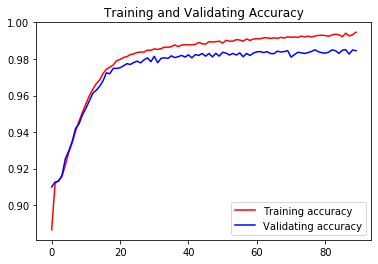

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_11_3_model.h5')